<a href="https://colab.research.google.com/github/ragarc/shiny-rotary-phone/blob/main/CS12_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.datasets.mnist as dataa
from keras.utils import np_utils

In [2]:
(train_images, train_labels), (test_images,test_labels) = dataa.load_data()
train_images = np.reshape(train_images, (60000, 784)) / 255
test_images = np.reshape(test_images, (10000, 784)) / 255
Y_train = np_utils.to_categorical(train_labels,10)
Y_test = np_utils.to_categorical(test_labels,10)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
def draw(img):
  plt.matshow(img, cmap='gray')
  plt.show()

In [4]:
def relu(x):
  #return 1/(1+np.exp(-x))
  return np.maximum(x,0)

lol = lambda x: 1 if x > 0 else 0

drelu = np.vectorize(lol)
#def drelu(x):
#  return np.exp(-x)/np.power(1+np.exp(-2),2)

In [5]:
def convolution(inpt, kernel):
  kx = (kernel.shape[0])
  ky = (kernel.shape[1])
  sz = (inpt.shape[0] - kx + 1, inpt.shape[1] - ky + 1)
  out = np.zeros(sz)
  print(out.shape)
  i = 0
  j = 0
  while i < sz[0]:
    j = 0
    while j < sz[1]:
      prod = inpt[i:kx+i, j:ky+j] * kernel
      out[i,j] = np.sum(prod)
      j += 1
    i += 1
  return out

In [16]:
class dense_net:
  # shape is a tuple containing the size of each hidden layer,
  # shape[0] = size of input
  # shape[-1] = size of output
  def __init__(self, shp, learning_rate=0.6):
    self.weights = []
    self.bias = []
    self.shape = shp
    self.l = len(shp)
    self.z = []
    self.z.append(np.zeros((shp[0],1)))
    self.n_o_params = 0
    for i in range(self.l-1):
      self.n_o_params += shp[i]*shp[i+1]
    self.learning_rate = learning_rate
    for i in range(len(shp)-1):
      self.weights.append(np.random.rand(shp[i+1], shp[i])-.5)
      self.bias.append(np.random.rand(shp[i+1],1)-.5)
      self.z.append(np.zeros((shp[i+1],1)))
    
  def predict(self, input_vec):
    inpt = input_vec.reshape(self.shape[0],1)
    self.z[0] = np.copy(inpt)
    for i in range(self.l-1):
      #print(self.z[i])      
      self.z[i+1] = (np.matmul(self.weights[i], relu(self.z[i])) + self.bias[i])
    
    return relu(self.z[-1])

  def backprop(self, input_vec, label, weight_slots, bias_slots):
    # First do weight backpropagation
    w_gradients = []
    b_gradients = []

    y = np.array(label).reshape((self.shape[-1],1))
    out = self.predict(input_vec)

    #print(drelu(self.z[-1]))
    #print((y - out))
    delta = drelu(self.z[-1]) * (y - out)
    #print(delta)
    lyr = self.l - 2
    i = 0
    while lyr >= 0:
      # print(self.z[lyr])
      # print(self.weights[lyr])
      # print(delta)
      #print(lyr)
      #w_gradients.append(np.matmul(delta, relu(self.z[lyr]).transpose()))
      weight_slots[i] += np.matmul(delta, relu(self.z[lyr]).transpose())
      #print("weight inside backprop: ", weight_slots[i])
      #b_gradients.append(delta)
      bias_slots[i] += delta

      delta = drelu(self.z[lyr]) * np.matmul(self.weights[lyr].transpose(), delta)
      lyr -= 1
      i += 1
    #return (w_gradients, b_gradients)
  
  def train(self, data, labels, batch_size=50):
    w_g = []
    b_g = []
    out = []
    #print(self.shape)
    #print(self.l)
    for i in range(self.l-1,0,-1):
      #print(i)
      w_g.append(np.zeros((self.shape[i], self.shape[i-1])))
      b_g.append(np.zeros((self.shape[i],1)))

    #print(w_g)
    #print(b_g)
    err = 0
    for i in range(len(data)):
      self.backprop(data[i], labels[i], w_g, b_g)
      err += self.loss(data[i], labels[i])
      #print(err)
      #print(w_g)
      #print(b_g)
      if i % batch_size == 0:
        print("the batch error is: ", err/batch_size)
        out.append(err/batch_size)
        for j in range(self.l-1):
          #print(self.weights[j])
          #print(w_g[self.l-2-j])
          self.weights[j] += w_g[self.l-2-j]*(self.learning_rate / batch_size)
          self.bias[j] += b_g[self.l-2-j]*(self.learning_rate / batch_size)

          w_g[self.l-2-j] -= w_g[self.l-2-j]
          b_g[self.l-2-j] -= b_g[self.l-2-j]
        err = 0
    return out

  def loss(self, test, label):
    y = np.array(label).reshape((self.shape[-1],1))
    results = (self.predict(test) - y).reshape(self.shape[-1])
    return np.dot(results, results)

    

In [17]:
n = dense_net((2,4,2))

In [18]:
data = np.random.rand(10000,2)
labels = []
for i in data:
  if max(i[1],i[0]) < 0.6:
    labels.append([0,1])
  else:
    labels.append([1,0])
lol = np.array(labels)

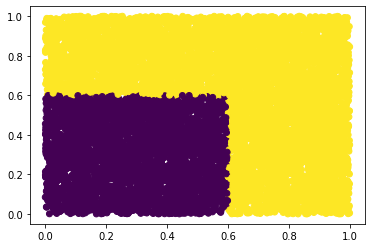

In [19]:
plt.scatter(data[:,0], data[:,1], c=lol[:,0])

In [20]:
u = []
for i in range(1):
#  u = (n.train(train_images, Y_train, 10))
    n.train(data, lol)

the batch error is:  0.016393920728078618
the batch error is:  0.638551278879879
the batch error is:  0.4963177223638918
the batch error is:  0.511106425286341
the batch error is:  0.36689412918728925
the batch error is:  0.31475574959029423
the batch error is:  0.4952967080577447
the batch error is:  0.4711653334185699
the batch error is:  0.3797178315442648
the batch error is:  0.3933059540153339
the batch error is:  0.3568088643738909
the batch error is:  0.4737776427130853
the batch error is:  0.3852358238069788
the batch error is:  0.30463978776991363
the batch error is:  0.37572078934288305
the batch error is:  0.36583587767757764
the batch error is:  0.3373316663383498
the batch error is:  0.33153787798628725
the batch error is:  0.32320325003196565
the batch error is:  0.33811412259909185
the batch error is:  0.33113466566444283
the batch error is:  0.4844936016606352
the batch error is:  0.8287137995318564
the batch error is:  0.693368084464748
the batch error is:  0.261127172

In [21]:
predicted = []
for i in data:
  l = n.predict(i).reshape(n.shape[-1])
  l[l<max(l)] = 0
  l[l>=max(l)] = 1
  
  predicted.append(l)
predicted = np.array(predicted)
print(predicted)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


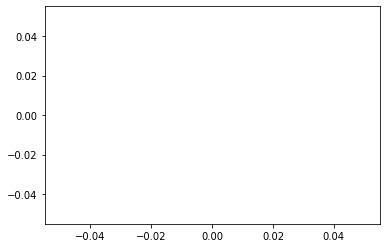

In [22]:
plt.plot(np.linspace(0,1,len(u)),u)

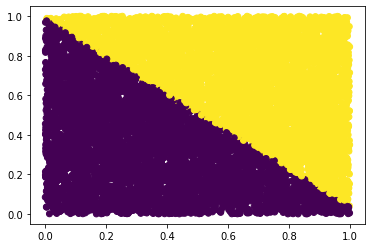

In [23]:
plt.scatter(data[:,0], data[:,1], c=predicted[:,0])